In [1]:
# SET UP (it will take a long time to run)
using Pkg; Pkg.activate("C:/Users/nicot/GitHub/Tutorial_DynMacro")
using Plots; using Optim; using Interpolations; using LinearAlgebra; using Distributions
Pkg.status()

  Activating environment at `C:\Users\nicot\GitHub\Tutorial_DynMacro\Project.toml`


      Status `D:\GitHub\Tutorial_DynMacro\Project.toml`
  [31c24e10] Distributions v0.23.11
  [2774e3e8] NLsolve v4.5.1
  [429524aa] Optim v1.4.1
  [fcd29c91] QuantEcon v0.16.2


# Excercise 8.1 Sargent & L.

Sthocastic endowment $y_{t+1}=\lambda_{t+1}y_t$

Where $\lambda$ is a first order two states Markov process

States $\bar{\lambda}_1=0.98$  $\bar{\lambda}_2=1.03$

Probability transition matrix:
$ \begin{pmatrix}
p_{11} & p_{12} \\
p_{21} & p_{22}
\end{pmatrix}=
\begin{pmatrix}
0.80 & 0.20 \\
0.15 & 0.85 
\end{pmatrix}
$


Preferences are represented by an intertemporal expected utility function with discount factor $\beta = 0.96$; and with a CRRA function with risk-aversion coefficient $\gamma = 2.0$ as the Bernoulli utility function.





In [2]:
# Parametros del modelo
γ = 2.0
β = 0.96 
u(c) = γ==1.0 ?  log(c)  :  c^(1-γ)/(1-γ)   # CRRA

λ=[0.98 1.03]
Π=[0.80 0.20; 
   0.15 0.85]

β = 0.96

0.96

In [3]:
# Condiciones iniciales
y_0 = 1.0
λ_0 = 0.98

0.98

In [20]:
# funcion para crear historias
function historia_simu(P; init = 1, sample_size = 1000)
    @assert size(P)[1] == size(P)[2] # es una matriz cuadrada?
    N = size(P)[1]

    dists = [Categorical(P[i, :]) for i in 1:N]  # crea N distribuciones

    X = fill(0, sample_size) # crea un vector
    X[1] = init # primer estado

    for t in 2:sample_size
        dist = dists[X[t-1]] # selecciona la distribucion correspondiente
        X[t] = rand(dist) # saca un valor aleatorio segun la distribución
    end
    return X
end


# Construyo diferentes historias de lambdas
Time=100
λhist_1 = historia_simu(Π, init = 1, sample_size = Time)
λhist_2 = historia_simu(Π, init = 1, sample_size = Time)
λhist_3 = historia_simu(Π, init = 1, sample_size = Time)

100-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 2
 2
 2
 2
 1
 ⋮
 2
 1
 1
 1
 1
 1
 2
 1
 1
 1
 1
 1

In [21]:
# Inicializo historias (secuencias) de ingresos
y_path_1 = fill(0.0, Time)
y_path_2 = fill(0.0, Time)
y_path_3 = fill(0.0, Time)

y_path_1[1] = y_0
y_path_2[1] = y_0
y_path_3[1] = y_0

# Actualizo conforme a las historias de lambda
for t in 2:(Time)  
    y_path_1[t] = λ[λhist_1[t]] * y_path_1[t-1]
    y_path_2[t] = λ[λhist_2[t]] * y_path_2[t-1]
    y_path_3[t] = λ[λhist_3[t]] * y_path_3[t-1]

end

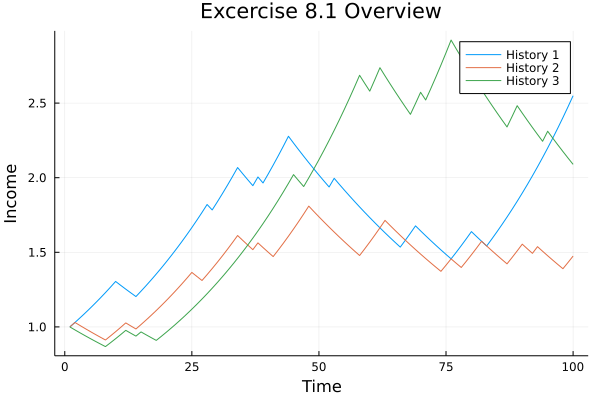

In [22]:
plot(1:Time,y_path_1,label="History 1",title="Excercise 8.1 Overview",xlabel="Time", ylabel="Income")
plot!(1:Time,y_path_2,label="History 2")
plot!(1:Time,y_path_3,label="History 3")